ABMs are an interactive modeling experience and nice playgrounds for testing 'what-if' scenarios in a virtual world 

For an ABM to also be good science and give us meaningful conclusions, we need to wrap the technical aspects of its design up with proper methodology and ensure we are considering the:
- specific problem to be solved by the ABM
- availability of data
- method of model validation

Sayama says that: "Meaningful conclusions" implies there are implications for the real-world system being modeled:
- Building an ABM using assumptions derived from empirically observed phenomena, and then produce previously unknown collective behaviours
- Building an ABM using hypothetical model assumptions, and reproducing empirically observed collective phenomena

I agree.

But Sayama also says that: analysis is "generally not easy to conduct an elegant mathematical analysis of an ABM", which is why there is no “Analysis” chapter on ABMs in his textbook. I disagree. I think 'meaningful conclusions' requires a proper analysis

The Complexity Explorables are typically lacking in the analysis department

Today we'll return to the Vicsek explorable (https://www.complexity-explorables.org/slides/horde-of-the-flies/), in particular, and and analyse it properly.

# Vicsek model
This model was introduced by Tamás Vicsek (and colleagues not fortunate enough have the model named after them) in 1995 to simulate the collective motion of self-propelled particles

Vicsek's particles adjusted their velocities to align with the average velocities of the neighbouring agents

That's it. Nothing more, nothing less. And it is exactly this minimal nature that gives us a chance of mathematical analysis

>*“...I had designed the moving version of the Heisenberg model."* — Vicsek (https://www.nature.com/articles/529016a)

See the original publication here: https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.75.1226


Our understanding of emergent phenomena such as phase transitions and criticality, and the quest for universal laws and patterns of collective behaviour has gained enormous benefit from the study of simple models like this

This model plays a prototypical role, similar to the one played by the Ising model for equilibrium ferromagnetism and has been adopted as the starting point for many generalisations and variations.

## Ising model

Ising model of ferromagnetism in statistical mechanics

The model consists of discrete variables that represent magnetic dipole moments of atomic "spins" that can be in one of two states (+1 or -1) i.e. 1D

Neighbouring spins that agree have a lower energy than those that disagree; the system tends to the lowest energy but heat disturbs this tendency, thus creating the possibility of different structural phases

The model allows the identification of *phase transitions* as a simplified model of reality


<img src="Ising_quench_b10.gif" width="400" align="center">

By HeMath - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=37327967

### XY model
XY is a generalisation of the Ising model with the dipole able to have any state  i.e. 2D

Magnetic dipoles that rotate and align with the magnetic field of their surrounding

If the dipoles are initialised randomly then what will happen?

https://www.complexity-explorables.org/explorables/if-you-ask-your-xy/

Inspired by this, Vicsek and his team began to think about what it would mean for the spins in a ferromagnet to have the freedom to move

(The Heisenberg Model is a more general model of three-component spins (i.e. 3D), so technically Vicsek had designed the moving version of the XY model).

## Model specifics
- the world and environment: 2D square domain with periodic boundaries, the environment has no state.
- the agents: $N$ point particles
- the possible states (or attributes): position and velocity (direction)
- the initial state: random
- the interaction network: metric with maximum distance $r$
- the rules for updating the agent state: assume average direction of neighbours + some noise, synchronous updates for all agents at each time step. Note this describes "overdamped dynamics" as the inertial effects are negligible, and the motion of the agents is primarily determined by the forces acting on them (change their relative position according to their velocity fluctuations), rather than by their own momentum. The system is far from equilibrium because the particles are self-propelled.

In the original model:
- we choose a convenient set of space and time units, such that $\Delta t = r = 1$ 
- set $\text{speed}=v=0.03$.
- model behaviour only depends on three control parameters: the noise amplitude $\eta$ and total density of particles $N/V$.

## Modelling steps
1. initialise a domain (square domain with periodic boundaries, agent.velocity is a random direction with constant speed, agent.position is random inside of domain)
<!-- periodic boundary help to minimise finite size effects due to finite boundaries -->
2. initialise $N$ agents and their attributes:
    - position: A tuple representing the x and y coordinates of the agent.
    - velocity: A tuple representing the agent's current velocity, $\mathbf{v}$ defined by the heading $\theta$ and a constant, $\text{speed}$.
3. determine each agents' neighbours (defined as those inside of a circle of radius, $r$, centred at the agent)
4. average the velocities of each agents' neighbours (including self in neighbourhood)
5. update agent attributes:
$$
\color{white}{\theta(t+1) = \langle \theta(t) \rangle_r + \Delta \theta}
$$
$$
\color{white}{\mathbf{x}(t+1) = \mathbf{x}(t) + \mathbf{v}(t) \Delta t}
$$

$\Delta \theta$ is a random number chosen with a uniform probability from the interval $[-\eta/2, \eta/2]$.

<!-- With this choice, $\eta = 2\pi$ is the largest meaningful noise amplitude. At each time step, it completely randomises all particle headings in the interval $[-\pi,\pi]$, dominating alignment for a collection of independent random walkers. -->


### Noise
The role of randomness in models of complex systems:
- account for uncertainties and the unpredictable nature of complex systems
- reflects the inherent variability in complex systems
- analagous to temperature in equilibrium systems (driving phase transitions)
- gives a more robust and realistic model, e.g. showing how coherent motion can emerge even in the presence of imperfections

Different sources of noise:
- **Scalar/Intrinsic noise:** agent makes "mistake" when moving in the (perfectly determined) direction 
    - $\theta(t+1) = \langle \theta(t) \rangle_r + \Delta \theta$
- **Vectorial/Extrinsic noise:** errors/uncertainties in the particle-particle communication mechanism/assessment of neighbour directions 
    - $\theta(t+1) = \langle \theta(t) + \Delta \theta \rangle_r$

<!-- Note that extending the vectorial noise to any spatial dimension is straightforward, while scalar noise requires some more thought -->

The Vicsek model is robust to the source of noise provided that no long-range correlations are introduced.

##### Limiting cases  

Limiting cases are often interesting and worth exploring as the model reduces to well-known models of equilibrium statistical physics

e.g. in the limit, $v \rightarrow 0$, the interaction network is fixed and the individuals are just selecting a new direction without moving at each time step. The model reduces precisely to that of a two-dimensional XY model. We interpret he velocity of the individual as the local spin, the strength of the alignment interaction is proportional to the density like an external magnetic field and the noise is like temperature

Other limiting cases:
- $r\rightarrow 0$: non-interacting persistent random walkers with equilibrium distribution with some temperature given by the noise term
- $r \rightarrow \infty$: long ranged interaction, system is globally coupled and the connectivity matrix is trivially static
- $v \rightarrow \infty$: for $v >> L$, any small fluctuation in the orientation will push nearby particles infinitely apart. With periodic boundary conditions this is equivalent to random rewiring of interactions and hence motion decouples from alignment

It is **not** possible in general to deduce properties of the Vicsek model in general from the study of the limiting cases. 

# Qualitative analysis
The first thing we did with our model is to simulate it and play around, observing how the agents move over time and the group behaviour that emerges

This gives us a *qualitative* understanding of the behaviour of the collective and how it depends on the parameter settings for $L$ (which is effectively density) and $\eta$ (the amount of stochasticity) 

The simulations are nice for our understanding but they are typically relegated to supplementary material in publications in favour of snapshots in time or trajectories:
<center>
<img src="Vicsek_TypesOfBehaviour.png" width="700">
</center>

[Image source](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.75.1226)
    
Again, we are seeing simple interactions among individuals leading to complex global patterns

To really understand the system we need to do some *quantitative* analysis. 

# Quantitative analysis
We seek a generalisable and statistically reliable description of observations via appropriate metrics at the individual or group level

Flocking models lean heavily on methods and measures successfully used in statistical physics

*Order parameters* characterise how ordered the macroscopic state of the system is

In keeping with the spin-model analogy, the Vicsek model used the average normalised velocity as a *polarisation order parameter*, $v_a$:

$$
v_a = \frac{1}{Nv}\Bigg| \sum_i^N \vec{v}_i \Bigg|
$$

- $N$ is the number of agents
- $\vec{v}_i$ is the $i$th agent's velocity
- $v$ is the (constant) speed of all agents

This is a value that ranges from 0 to 1, where 0 indicates no order and 1 indicates maximal order and coherent motion (this is why we can refer to it as an order parameter)

It tells us something about the group behaviour.

<!-- Note that in the context of physics and complex systems, "parameter" has a broader meaning from how "parameter" is commonly used in mathematics or programming. In general we might refer to the quantity that characterises the state of the system as *state variable* or *state descriptor*. -->

What would $v_a$ be for each of these behaviour regimes?

![](images/Vicsek_types_of_behaviour.png)

Fig from [Vicsek 1995](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.75.1226)

The variety in behaviour is a consequence of different parameters 

In the Vicsek model the relevant parameters are: 
- density via the size of the domain, $L$, with fixed particle number
- noise, $\eta$

<center>
<img src="Vicsek_TypesOfBehaviour_withCaption.png" width="500">
</center>


There are other parameters in this model, such as the speed $v$ but *'According to our simulations, in a wide range of the velocities ($0.003 < v < 0.3$), the actual value of $v$ does not affect the results'* - Vicsek et. al, 1995

Here, 'the results' refers to the physical properties of the emergent behaviour

Many other model variations are equally irrelevant:
- noise distributed according to a Gaussian
- small, short ranged repulsion force to account for volume exclusion 
- position $x_i$ at time $t + \Delta t$ may be determined by the velocity at time $t+\Delta t$ and not at time $t$
- ...

We'd like a more general understanding of how these parameters influence the behaviour. In particular, we want answers to:
- Under what conditions are the different behaviours are happening?
- How do we transition from one behaviour to another?

## Parameter sweeps
The phase transitions are bifurcations in the macroscopic properties, captured by changes in the relevant *state variables*

We track these properties as we vary the relevant parameters

For Vicsek, that means we compute the polarisation order parameter for each simulation as we vary the noise and/or density

It's akin to a transition from solid to liquid to gas as temperature and pressure are varied.

## Ensemble runs
To properly demonstrate phase transitions we must show that they occur in general, because a single simulation doesn't tell you much (and may even be misleading)

Monte Carlo are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results that statistical measures can be calculated from

<center>
<img src="Vicsek_Results1.png" width="500">
</center>

The original paper runs five simulations at each parameter setting and states that the error bars are generally within the size of the symbol. If this wasn't the case you'd need to show the variation.

More common approach nowadays is to address everything at once

Here Couzin computes two different order parameters (polarisation and rotation) and shows the mean of 30 replicates:

<center>
<img src="Couzin_PhaseSpace.png" width="500">
</center>

Original publication: https://www.sciencedirect.com/science/article/pii/S0022519302930651?via%3Dihub

(See Flock n Roll: https://www.complexity-explorables.org/explorables/flockn-roll/ for the Explorable)

If you aren't re-initialising when starting a new simulation then interesting things can happen

<center>
<img src="Couzin_Hysteresis.png" width="500">
</center>

This effect is called *hysteresis*

It means that the state of the system depends on its history.


The ensemble of simulations is necessary to:
- capture the range of possible outcomes owing to variability (inherent randomness, stochastic processes, or sensitivity to initial conditions)
- explore effects of uncertainty, providing a distribution of possible outcomes
- reduce noisy or outlier results and identify (and estimate probability of) rare events
- give a better understanding of parameter sensitivities
- highlight emergent behaviour as consistent patterns or structures that emerge across different simulations
- validate the robustness of model predictions. 

This gives a more comprehensive and reliable picture of the system.

## Bringing results back to the real world

We have a complete understanding of the physical laws that lead all spins in a ferromagnet to self-organise and produce a spontaneous magnetisation (self-organisation) but when it comes to birds, until about 15 years ago we knew almost nothing

The basic rules of interaction assumed by Reynolds, Couzin etc were just educated guesses as opposed to well-established scientific fact

Empirical  insight came from Cavagna and Gardina's work as part of STARFLAG

STARFLAG used stereoscopy (two simultaneous images of the same object taken from different positions in space to reconstruc the exact 3D position of an object. Our eyes and brain use it to estimate distances and give sense of 3D)

Correspondence problem: We need to match the individuals in the two images but due to the different positions of the left and right cameras (25 metres apart and ~100 metres from the birds), the flock can look very different

This allowed a comparison of models on a quantitative basis to real flocks, whereas previously we could only assess similarity qualitatively.

<!-- showed something quite different: each bird interacts with a fixed number of neighbours, irrespective of their physical distance. This number is approximately equal to seven. The difference with the assumptions of the models is stark: the data show clearly that the distance within which birds interact is not fixed at all, but rather it depends on the density of the flock. -->

<!-- While metric distance is the landmark of fundamental interactions in physics, topological distance is more common in social and technological networks. A topological interaction, on the other hand, has a strength that is independent of the metric distance between birds and, thus, is  significantly more robust when the flock goes through a severe perturbation.  -->


<center>
<img src="StarlingReconstruction.png" width="400">
</center>


<p style="page-break-after:always;"></p>

# To summarise...
An agent-based simulation is interesting but not scientific

To properly report results we need to:
1. quantify the observed behaviour (at the macro and maybe also the micro-levels) with something like an order parameter
2. demonstrate how the behaviour depends on parameters with
    - parameter sweeps
    - ensemble runs to report statistics

# Unused material...

# Dimensionless constants
It is instructive to convert to dimensionless units in problems that are governed by many dimensional parameters, for example in typical growth models. Using dimensionless units allows us to identify the minimal number of dimensionless parameters. It also allows for easier comparison between different dynamical quantities and different pa- rameters. In dimensionless form the magnitude of all dimensionless parameters can be directly related to the values of other parameters or to unity (this simplifies numerical simulations or investigation of limit- ing cases). In contrast, dimensional parameters must be compared to all other combinations of parameters with the same dimension. 

# Numerical integration
To simulate a continuous-time model we have to numerically integrate differential equations.
The mathematics area of numerical analysis concerns itself with fast, efficient, and accurate methods for numerical integration of differential equations. We will not concern ourselves with these and either rely on implementations available in python such as ```odeint``` or very basic methods. Note that when implementing large models, or simulating dynamics in the presence of noise, it is often more pragmatic to use simple numerical methods as long as we remain aware of their limitations. Indeed, simulations of dynamical noise only lends itself to simple integration methods.

**The Euler forward method:** accumulate small changes in the function $f$ based on the local derivatives specified by a differential equation.

Recall the definition of the derivative of a function $f(t)$ from first principles is:
$$
\frac{df}{dt}=\lim_{\Delta t \rightarrow 0} \frac{f(t+\Delta t)- f(t)}{\Delta t}
$$

Approximating the derivative as:
$$
\frac{x(t+\Delta t)- x(t)}{\Delta t}
$$

We can convert the differential equation to an iterative map:
$$
x(t+\Delta t)=x(t) + \Delta t f(x(t))
$$
This will approach the true solution of the differential equation in the limit $\Delta t\rightarrow 0$. For finite $\Delta t$ the method may seem crude and is not so accurate and there are many more sophisticated methods (backward Euler, Runge-Kutta, Heun etc). Often though, we are willing to accept this in favour of the straightforward implementation and a faster simulation. We also need to be cognizant of other issues such as stability and convergence of solutions, which can arise from the discretisation of time. 


The simplest and still the most successful approximation is the Euler method or similarly, the Euler-Maruyama method if the model includes stochastic terms

This takes only the first two terms of the Taylor series expansion of the solution for a reasonable approximation

For particle motion we can update the individual's position and velocity every $\Delta t$ (indicative of the frequency of decision making)

These are first-order forward difference equations (because unknown future values are written only in terms of known previous or current terms, whereas backward Euler methods are implicit as they are functions of future terms) 
$$
\color{white}{\vec{v}_i(t+\Delta t) = \vec{v}_i(t) \vec{F}_i(t)\Delta t}
$$
$$
\color{white}{\vec{x}(t+\Delta t) = \vec{v}_i(t) + \vec{v}_i(t) \Delta t + \sigma d \vec{W}_i}
$$

Note that $\sigma$ is the standard deviation of the noise and $d\vec{W}_i$ is the Wiener increment that results from an extrinsic Gaussian random force such that a solitary individual not experiencing any external forces will expore space as a random walker

In the limit of large damping and no inertia we make a first order reduction with $\vec{v}_i=\vec{F}_i$ such that only the position update is required

As an example, consider the logistic function:
$$
\frac{dx}{dt}=rx\big(1-\frac{x}{\kappa}\big)
$$
with $r=0.2, \kappa=1$

Numerical integration yields:
$$
x(t+\Delta t)=x(t) + \Delta t \Big[ rx\big(1-\frac{x}{\kappa}\big)\Big]
$$

With a timestep $\Delta t=0.01$ and an initial conditiion $x(0)=0.1:

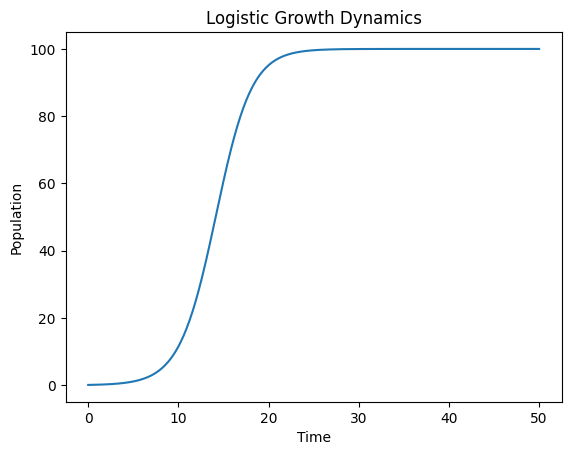

In [14]:
def logistic_growth_equation(x:float, r:float, K:float) -> float:
    """
    Compute the logistic growth equation for a single population.

    INPUTS:
        x: Current population value.
        r: Growth rate.
        K: Carrying capacity.

    OUTPUTS:
        The rate of change of the population according to the logistic growth equation.
    """
    return r * x * (1 - x / K)

def simulate_logistic_growth(x0:float, r:float, K:float, time_step:float, total_time:float) -> tuple:
    """
    Simulate the logistic growth of a single population over time.

    INPUTS:
        x0: Initial population.
        r: Growth rate.
        K: Carrying capacity.
        time_step: Time step between each simulation point.
        total_time: Total simulation time.

    OUTPUTS:
        A tuple containing the time points and corresponding population values.
    """
    num_steps = int(total_time / time_step) + 1
    t = np.linspace(0, total_time, num_steps)
    x = np.zeros(num_steps)
    x[0] = x0

    for i in range(1, num_steps):
        dx_dt = logistic_growth_equation(x[i - 1], r, K)
        x[i] = x[i - 1] + dx_dt * time_step

    return t, x

# Example usage
x0 = 0.1  # Initial population
r = 0.2  # Growth rate
K = 1  # Carrying capacity
time_step = 0.01  # Time step
total_time = 50  # Total simulation time

t, x = simulate_logistic_growth(x0, r, K, time_step, total_time)

# Plotting the population dynamics
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic growth dynamics')
plt.show()

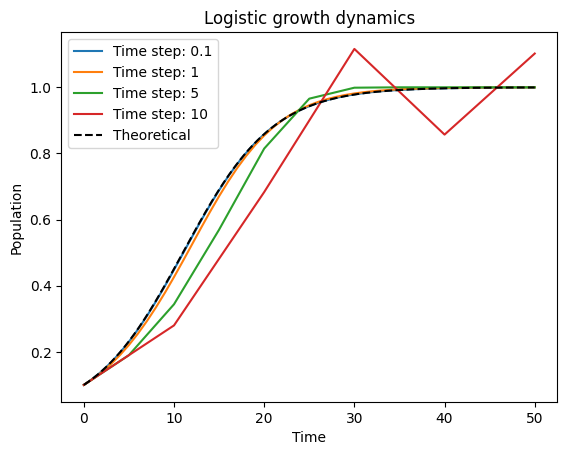

In [20]:
#To see how this changes for different timesteps...
    
def logistic_growth_theoretical(t: float, x0: float, r: float, K: float) -> float:
    """
    Compute the theoretical solution of the logistic growth equation for a given time.

    INPUTS:
        t: Time.
        x0: Initial population.
        r: Growth rate.
        K: Carrying capacity.

    OUTPUTS:
        The population value at the given time according to the theoretical solution of the logistic growth equation.
    """
    return K / (1 + ((K / x0) - 1) * np.exp(-r * t))

# Example usage:
x0 = 0.1  # Initial population
r = 0.2  # Growth rate
K = 1  # Carrying capacity
time_steps = [0.1, 1, 5, 10]  # List of time steps
total_time = 50  # Total simulation time

plt.figure()

for time_step in time_steps:
    t, x = simulate_logistic_growth(x0, r, K, time_step, total_time)
    plt.plot(t, x, label=f'Time step: {time_step}')

t_theoretical = np.linspace(0, total_time, 1000)
x_theoretical = logistic_growth_theoretical(t_theoretical, x0, r, K)
plt.plot(t_theoretical, x_theoretical, 'k--', label='Theoretical')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic growth dynamics')
plt.legend()
plt.show()


# Noise

**Observational/measurement noise:** is relatively straightforward to simulate by assuming a distribution for $\eta(t)$ and adding samples of it to the observations.
$$
y(t)=g(x(t))+\eta(t)
$$
where $g(x(t))$ is the observation function. 

**Dynamic noise:** is harder to do properly. 
$$
\dot{x}(t)=f(x(t))+\xi(t)
$$

To simulate dynamic noise we'll need stochastic differential equations.

This is a Langevin equation:
$$
\dot{x}=f(x,t)+\sqrt(D(x,t)\xi(t)
$$
$f(x,t)$ is a drift term and $\sqrt(D(x,t)\xi(t)$ is the stochastic force with variance $D$ and $\xi\sim N(a(x,t),D(x,t))$ and $\langle \xi(t)\xi(t')=\delta(t-t')\rangle$. With $f(x,t)=0$ and $D(x,t)=D$ this is Brownian motion.

The problem with noise like this is that $\xi$ is non-differentiable and the delta correlation leads to difficulties in the usual ode-solvers like Runge-Kutta. And so the Euler-Maruyama method is the only option (for us).


**Simulating stochastic differential equations with Euler-Maruyama**

Langevin stochastic differential equation
\begin{equation*}
\dot{x} = f(x) + \sqrt{D}\xi,
\end{equation*}
where $f(x)$ is the deterministic (noise-free) dynamics, $\sqrt{D}\xi$ is the dynamic noise, $D$ is the variance of the noise, and $\xi \sim N(0,1)$ (white noise drawn from a Gaussian distribution).\\

For small times $\tau$ we assume $f(x)$ to be constant and write:
\begin{equation*}
x(t+\tau) - x(t) = \tau f(x) + \mbox{ stochastic term},
\end{equation*}
or,
\begin{equation*}
x(t+\tau) = x(t) + \tau f(x) + \mbox{ stochastic term}.
\end{equation*}

To deal with the stochastic term we consult the master, Einstein, and his results on Brownian motion where the change in position of a Brownian particle scales like $\sqrt{\tau}$, and this leads to
\begin{equation*}
\mbox{stochastic term } = \sqrt{D\tau}(\xi - \xi'),
\end{equation*}
where $\xi$ and $\xi'$ are two noise realizations drawn from a normal distribution $N(0, 1)$.\\

This is called a Wiener increment
\begin{equation*}
d W=\sqrt{D\tau}(\xi-\xi').
\end{equation*}
Thus, to numerically intergrate a dynamical system subject to additive dynamic noise corruption, we use
\begin{equation*}
x(t+\tau) = x(t) + \tau f(x) + dW.
\end{equation*}

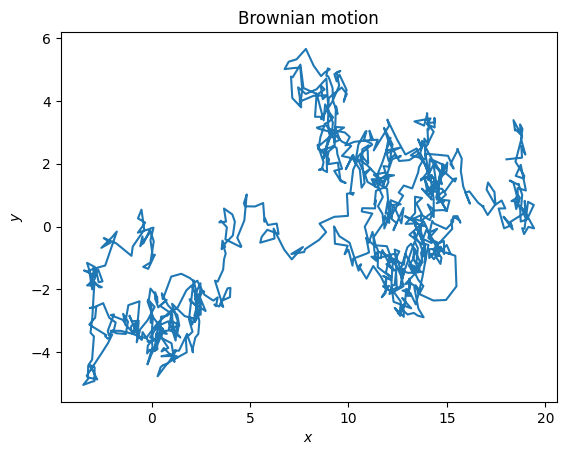

In [22]:
def simulate_brownian_motion(num_steps, step_size):
    # Generate random displacements
    displacements = np.random.normal(loc=0, scale=np.sqrt(step_size), size=(num_steps, 2))
    
    # Calculate cumulative sum of displacements
    positions = np.cumsum(displacements, axis=0)
    
    return positions

# Set the number of steps and step size
num_steps = 1000
step_size = 0.1

# Simulate Brownian motion
positions = simulate_brownian_motion(num_steps, step_size)

# Plot the results
plt.plot(positions[:, 0], positions[:, 1])
plt.title("Brownian motion")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()


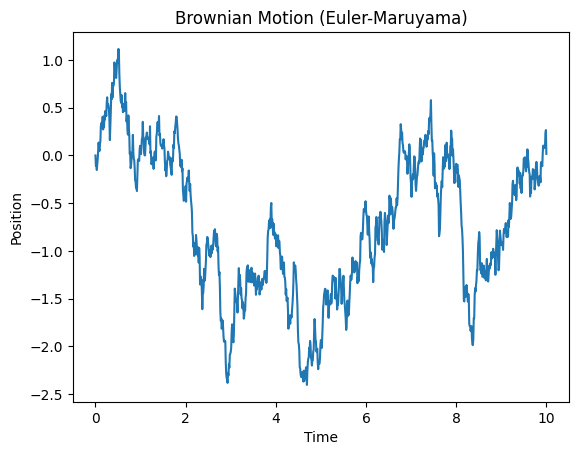

In [23]:
def simulate_brownian_motion(num_steps, step_size, initial_position=0, drift=0, volatility=1):
    positions = np.zeros(num_steps + 1)
    positions[0] = initial_position
    
    for i in range(num_steps):
        dW = np.random.normal(loc=0, scale=np.sqrt(step_size))  # Wiener increment
        positions[i + 1] = positions[i] + drift * step_size + volatility * dW
    
    return positions

# Set the number of steps and step size
num_steps = 1000
step_size = 0.01

# Set parameters for the SDE
initial_position = 0
drift = 0  # Drift coefficient
volatility = 1  # Volatility coefficient

# Simulate Brownian motion using Euler-Maruyama integration
positions = simulate_brownian_motion(num_steps, step_size, initial_position, drift, volatility)

# Plot the results
time = np.arange(0, num_steps + 1) * step_size
plt.plot(time, positions)
plt.title("Brownian motion (Euler-Maruyama)")
plt.xlabel("Time")
plt.ylabel("Position")
plt.show()


## Slime
**Keller-Segel slime mold aggregation model** 

Slime mold cells are represented by individual agents, which interact with the environment. 

**The environment:** 
- represents the concentration of cAMP molecules at each location. 
- updates with spontaneous decay/evaporation of the cAMP concentration. 
- can be modelled by discretising as we did for reaction-diffusion systems.

**Agent interaction with the environment:**
- agents secrete cAMP
- agents move via chemotaxis with probability based on the difference in cAMP concentration of the surrounding neighbourhood
- there is no self propulsion or agent interaction (only stigmergy)

## How do previous week's topics relate?

**Previous topics:**

*Reaction-diffusion*
- self-organising patterns can be similar to what the PDE-based model produced (as is the case with stigmergy-type interaction). PDE-based simulations form patterns simultaneous with regular spacing but the ABM version allows the formation of concentration variations to be more natural natural.

*Cellular automata*
- An agent-based model is (sort of) similar to a model of cellular automata. The key difference is that with a cellular automata it is the discretised cells, which comprise the world, that update their state, whereas with agent-based models the agents exist in a world that is separate to them. 

*Synchronisation*
- The collective phenomena discussion didn't refer to agent-based models but it easily could have. Fireflies are agents, the Kuramoto oscillators are agents.

**Upcoming topics:**

- Agents can evolve!
- Agents can play games!

## Connection to other units

**MATH3002**
- Different interaction networks
- swarm reservoir.

**MATH3021**
- local dynamics could be governed by coupled equations
- swarm reservoir